In [8]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YQZ2UeOTO3I?start=830" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


As the incredibly eloquent British parrot so brilliantly explains in the video above, the ACA introduced a provision that compelled drug companies to publicly disclose every payment made to medical providers. 

The database can be searched at https://openpaymentsdata.cms.gov/ 

A more detailed dataset, spanning over 5 years, is also available at: https://www.cms.gov/OpenPayments/Explore-the-Data/Dataset-Downloads.html

The dataset at the aforementioned URL is rather large and complex and possibly unwieldy, but with great data comes great opportunity. With 10s of millions of rows and 75 columns the data is riped to be mined for answers to a myriad of interesting questions about the influence - both its extent and its source - of corporate money on the American healthcare system.

Questions like:

How do the 50 states rank in the payments?

What are the more popular sources of payment?
 

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
plots.style.use('fivethirtyeight')
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
# tob = pd.read_sas('tob.sas7bdat',format='sas7bdat')
# tob

In [3]:
# print(tob.shape)

read_csv():
    
    The arg 'iterator' in the read_csv function returns an iteratable object instead of a dataframe.
    
    The arg chunksize defines how many rows are read at a time
    
    The arg nrows specifies how many of the first n rows to read from the file.
    
concat():

    adds a new dataframe to the existing dataframe
    
    The for loop inside the function takes a chunk from the iteratable initialized in the last line and applies the conditional on each row of that chunk.  

In [2]:
iter_csv = pd.read_csv('general_16.csv',iterator=True, chunksize=1000, nrows=10000000)
general = pd.concat([chunk[chunk['Total_Amount_of_Payment_USDollars'] < 50] for chunk in iter_csv])
print(general.shape)
general.head()


(8164412, 75)


,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,87419.0,ARTURO,NaN,OLIVERA,JR.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/28/2019
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,87419.0,ARTURO,NaN,OLIVERA,JR.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/28/2019
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,859210.0,FRANCISCO,ANTONIO,QUINTEROS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/28/2019
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,859210.0,FRANCISCO,ANTONIO,QUINTEROS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/28/2019
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,216043.0,DZIFAA,KOFI,LOTSU,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/28/2019


read_csv():
    
        another way to read from a csv is to use the skiprows arg which specifies which rows to skip when reading the file. The arg can either be an integer, a range, or a conditional

In [3]:
def logic(index):
    if index % 3 == 0 and index > 0:
       return True
    return False

general_3 = pd.read_csv('general.csv',nrows=1000000, skiprows= lambda x: logic(x))
general_3

C:\Users\Minhaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (4,7,9,11,14,16,17,21,22,23,24,28,35,36,37,40,41,42,43,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.



,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,NaN,NaN,NaN,258145.0,HOWARD,NaN,SADINSKY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
1,NEW,Covered Recipient Physician,NaN,NaN,NaN,291877.0,EUGENIO,NaN,LABADIE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
2,NEW,Covered Recipient Physician,NaN,NaN,NaN,37498.0,RACHEL,C,BERNSTEIN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
3,NEW,Covered Recipient Physician,NaN,NaN,NaN,197226.0,CATHERINE,NaN,CLINTON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
4,NEW,Covered Recipient Physician,NaN,NaN,NaN,77093.0,TIMOTHY,E,WIESS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
5,NEW,Covered Recipient Physician,NaN,NaN,NaN,571114.0,ELIZABETH,VALENTINE,BRANDEWIE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
6,NEW,Covered Recipient Physician,NaN,NaN,NaN,332660.0,DIANE,H,MORRISON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
7,NEW,Covered Recipient Physician,NaN,NaN,NaN,203851.0,JOSE,S,CISNEROS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
8,NEW,Covered Recipient Physician,NaN,NaN,NaN,880178.0,JENNIFER,O,HELLER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019
9,NEW,Covered Recipient Physician,NaN,NaN,NaN,362081.0,ANDREW,G,FIEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,06/28/2019


dropna():

    can be used to drop either rows or columns that contain NaN values. 
    
    In the example below axis=1 implies that the check should be performed along the columns (for rows axis=0)
    
    'thres' can be used to specifiy how many NaN values to account for during each check.

In [24]:
general.dropna(thresh=len(general.index)/2, axis=1, inplace=True)
print(general.shape)
general.head()

(809647, 37)


,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,...,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,258145.0,HOWARD,NaN,SADINSKY,321 BOSTON POST RD,MILFORD,CT,06460-2574,...,521226951,No,Yes,Covered,Drug,Adrenocorticosteroid,Prednisolone 25,0178-0582-08,2018,06/28/2019
1,NEW,Covered Recipient Physician,291877.0,EUGENIO,NaN,LABADIE,1111 MEDICAL CENTER BLVD,MARRERO,LA,70072-3151,...,521226945,No,Yes,Covered,Drug,Prenatal Vitamin & Mineral,CitraNatal,0178-0796-30,2018,06/28/2019
2,NEW,Covered Recipient Physician,270728.0,CESAR,A,REYES,4701 MEDICAL CENTER DR,MCKINNEY,TX,75069-1831,...,521226947,No,Yes,Covered,Drug,Prenatal Vitamin & Mineral,CitraNatal,0178-0796-30,2018,06/28/2019
3,NEW,Covered Recipient Physician,37498.0,RACHEL,C,BERNSTEIN,4701 N FEDERAL HWY,FT LAUDERDALE,FL,33308-4608,...,521226949,No,Yes,Covered,Drug,Prenatal Vitamin & Mineral,CitraNatal,0178-0796-30,2018,06/28/2019
4,NEW,Covered Recipient Physician,197226.0,CATHERINE,NaN,CLINTON,333 E SUPERIOR ST,CHICAGO,IL,60611-2654,...,521226953,No,Yes,Covered,Drug,Prenatal Vitamin & Mineral,CitraNatal,0178-0796-30,2018,06/28/2019


In [25]:
general['Total_Amount_of_Payment_USDollars'].unique().tolist()

[13.78,
 15.61,
 15.06,
 15.15,
 11.11,
 12.2,
 14.51,
 15.36,
 13.42,
 13.98,
 19.05,
 10.99,
 11.64,
 11.7,
 11.9,
 13.28,
 13.29,
 14.03,
 11.6,
 12.23,
 17.23,
 20.92,
 15.92,
 17.48,
 12.83,
 18.69,
 14.85,
 15.2,
 16.23,
 18.85,
 15.33,
 14.58,
 5.29,
 12.92,
 11.08,
 14.76,
 15.5,
 10.93,
 14.63,
 11.33,
 12.89,
 16.24,
 21.47,
 0.92,
 15.67,
 11.58,
 11.07,
 10.51,
 11.55,
 15.47,
 13.45,
 13.31,
 12.22,
 14.92,
 14.13,
 15.37,
 13.4,
 20.52,
 14.6,
 19.22,
 15.69,
 10.98,
 13.13,
 10.69,
 11.29,
 17.79,
 11.72,
 17.33,
 18.25,
 11.54,
 15.08,
 14.29,
 24.96,
 17.11,
 12.72,
 12.96,
 11.87,
 10.86,
 21.11,
 14.62,
 11.17,
 12.5,
 12.21,
 12.63,
 15.43,
 15.55,
 11.89,
 13.56,
 18.84,
 15.66,
 11.66,
 17.44,
 11.41,
 16.3,
 15.74,
 12.36,
 12.55,
 11.76,
 12.51,
 15.04,
 12.43,
 15.95,
 13.05,
 16.85,
 15.7,
 11.95,
 14.61,
 15.17,
 14.17,
 14.69,
 15.82,
 18.33,
 20.83,
 15.16,
 16.87,
 12.27,
 10.81,
 15.41,
 15.96,
 10.72,
 11.5,
 19.0,
 15.21,
 12.41,
 24.6,
 13.07,
 10.63,


In [26]:
general.columns

Index(['Change_Type', 'Covered_Recipient_Type', 'Physician_Profile_ID',
       'Physician_First_Name', 'Physician_Middle_Name', 'Physician_Last_Name',
       'Recipient_Primary_Business_Street_Address_Line1', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Physician_Primary_Type', 'Physician_Specialty',
       'Physician_License_State_code1',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator

pivot_table()

    construct a pivot table from the dataframe provided. 
    
    'values' specifies which column from the original dataframe to use while filling the table
    
    'index' specifies which column from the original dataframe to use as the index for the new table
    
    'columns' specifies along which dimensions to aggregate the 'values' column specified above. 
 
fillna()

    when aggregating values can be used to temporarily replace with NaN values with some pre-defined value

In [27]:
cov_noncov = pd.pivot_table(general, values='Total_Amount_of_Payment_USDollars',index = ['Recipient_State'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.mean)
cov_noncov['sum'] = cov_noncov.Covered.fillna(0) + cov_noncov['Non-Covered'].fillna(0)
cov_noncov.sort_values('sum')

Covered_or_Noncovered_Indicator_1,Covered,Non-Covered,sum
Recipient_State,,,
GU,17.151250,NaN,17.151250
AP,17.502143,NaN,17.502143
AA,19.440000,NaN,19.440000
VI,24.070000,NaN,24.070000
IN,14.316769,14.590080,28.906849
SD,15.945687,14.036522,29.982209
UT,16.176432,14.258261,30.434693
KY,14.401316,16.165053,30.566369
WY,16.259824,14.427000,30.686824


In [28]:
general.groupby('Nature_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum().to_frame()

,Total_Amount_of_Payment_USDollars
Nature_of_Payment_or_Transfer_of_Value,
Charitable Contribution,3.000000e+01
"Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",1.533480e+03
Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program,4.800000e+01
Consulting Fee,2.791240e+03
Current or prospective ownership or investment interest,8.710000e+00
Education,1.036948e+05
Entertainment,1.691140e+04
Food and Beverage,1.238494e+07
Gift,6.099739e+04


In [33]:
general['Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1'].unique().tolist()

['Prednisolone 25',
 'CitraNatal',
 'Urocit-K',
 'Aquoral',
 'Uribel',
 'Avar',
 'Ferralet',
 nan,
 'Binosto',
 'Texacort',
 'Eletone',
 'Ovace',
 'HemiCAP MTP Resurfacing',
 'HemiCAP Wrist',
 'CheckMate Toe Plate',
 'GlenoJet',
 'HemiCAP Shoulder',
 'BIOVANCE',
 'HemiCAP Patella-Femoral',
 'HemiCAP (development)',
 'Hammertoe Correction System',
 'HemiCAP Patella-Femoral XL',
 'ECM',
 'SUPREP',
 'System One',
 'None/NxStage Kidney Care',
 'Cartridges-Pure Flow',
 'Streamline',
 'Rezum',
 'Natesto',
 'TuzistraXR',
 'ZolpiMist',
 'AC2',
 'Myosure Manual',
 'ThinPrep',
 'NOVASURE',
 'Myosure',
 'Novasure',
 'NovaSure',
 'MyoSure',
 'Aquilex',
 'myosure',
 'SureSwab',
 'Aptima',
 'MyoSure Manual',
 'CTNG',
 'Thin prep',
 'AHPV',
 'Thin Prep',
 'fFN',
 'Aptima HPV',
 'Genesys',
 'Sexually Transmitted Infectious Disease',
 'Universal Screeening',
 'Thinprep',
 'myosure manual',
 'UNIVERAL SCREENING',
 'NuSwab',
 'Monalisa touch',
 'Myosure manual',
 'thin prep',
 'HPV',
 'Atv',
 'APTIMA HPV

In [34]:
general['Product_Category_or_Therapeutic_Area_1'].unique().tolist()

['Adrenocorticosteroid',
 'Prenatal Vitamin & Mineral',
 'Urological',
 'Artificial Saliva (oral use)',
 'Analgesic, antispasmodic & antiseptic (urinary)',
 'Antibacterial (topical)',
 'Hematinic',
 nan,
 'Anti-osteoporotic',
 'Adrenocorticosteroid (topical)',
 'Medical Device (topical)',
 'Musculoskeletal',
 'Allograft',
 'Wound Care',
 'Spine',
 'Cardiovascular Medical Device',
 'GASTROENTEROLOGY',
 'Nephrology',
 'Urology',
 'antitussive',
 'Anesthesiology Needles',
 'Diagnostics',
 'Surgical',
 'Aesthetics',
 'surgical',
 'Elastography',
 'diagnostics',
 'Neurology and Psychiatry',
 'Immunology',
 'Oncology',
 'Infectious Diseases & Vaccines',
 'Neuroscience',
 'Cardiovascular & Metabolism',
 'Trauma',
 'Sterilization',
 'Rhinology, Otology',
 'Rhinology',
 'Rhinology,Laryngology',
 'Cardiology',
 'Laryngology',
 'ROSACEA',
 'Topical local anesthetic',
 'Rhinology, Otology, Laryngology, Neurosurgery',
 'Rhinology, Laryngology',
 'Sports Surgical',
 'Energy',
 'Wound Closure',
 'End

In [35]:
general['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1'].unique().tolist()

['Drug', 'Device', nan, 'Biological', 'Medical Supply']

In [36]:
cov_noncov_2 = pd.pivot_table(general, values='Total_Amount_of_Payment_USDollars',index = ['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.sum)
cov_noncov_2['sum'] = cov_noncov_2.Covered.fillna(0) + cov_noncov_2['Non-Covered'].fillna(0)
cov_noncov_2.sort_values('sum')

Covered_or_Noncovered_Indicator_1,Covered,Non-Covered,sum
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,,,
Medical Supply,3208.75,NaN,3208.75
Biological,308463.52,71.26,308534.78
Device,3017157.57,15468.97,3032626.54
Drug,8630910.18,6054.35,8636964.53


In [37]:
cov_noncov_3 = pd.pivot_table(general, values='Total_Amount_of_Payment_USDollars',index = ['Product_Category_or_Therapeutic_Area_1'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.sum)
cov_noncov_3['sum'] = cov_noncov_3.Covered.fillna(0) + cov_noncov_3['Non-Covered'].fillna(0)
cov_noncov_3.sort_values('sum')

Covered_or_Noncovered_Indicator_1,Covered,Non-Covered,sum
Product_Category_or_Therapeutic_Area_1,,,
Woundcare,3.59,NaN,3.59
Ultrasound Catheters,9.84,NaN,9.84
Prosthetic Dentistry,10.80,NaN,10.80
Opthalmology,11.30,NaN,11.30
Implantable Foot and Ankle Medical Device,12.44,NaN,12.44
Orthopaedics,13.33,NaN,13.33
SPINAL VERTEBRAL BODY REPLACEMENT DEVICE,14.00,NaN,14.00
"DEVICE, FIXATION, PROXIMAL FEMORAL, IMPLANT",15.66,NaN,15.66
Cement,15.97,NaN,15.97


In [38]:
cov_noncov_3['sum'].nlargest(5)

Product_Category_or_Therapeutic_Area_1
Cardiovascular and Metabolism    879284.53
UROLOGY                          858624.44
DIABETES                         639109.42
Dental                           624079.38
OPHTHALMOLOGY                    597035.90
Name: sum, dtype: float64

In [39]:
general.loc[general['Product_Category_or_Therapeutic_Area_1'] == 'Oncology'].groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1')['Total_Amount_of_Payment_USDollars'].sum().to_frame('total').sort_values(['total'],ascending=False)

,total
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,
Abraxane,70365.05
CYRAMZA,45810.85
Lonsurf,44394.43
OPDIVO,42159.86
Erleada,37026.69
TAGRISSO,28114.49
IMFINZI,26323.42
LYNPARZA,14751.73
ZYTIGA,14484.54


In [40]:
general.loc[general['Product_Category_or_Therapeutic_Area_1'] == 'Dermatology'].groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1')['Total_Amount_of_Payment_USDollars'].sum().to_frame('total').sort_values(['total'],ascending=False)

,total
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,
Otezla,164149.54


In [41]:
general.loc[general['Product_Category_or_Therapeutic_Area_1'] == 'Devices'].groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1')['Total_Amount_of_Payment_USDollars'].sum().to_frame('total').sort_values(['total'],ascending=False)

,total
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,
VIABAHN VBX Balloon Expandable Endoprosthesis,30752.25
EXCLUDER AAA Endoprosthesis,30385.36
EXCLUDER Iliac Branch Endoprosthesis,26526.96
C3 Delivery System,21396.87
SYNECOR Biomaterial,16648.44
BIO-A Tissue Reinforcement,14203.20
VIABAHN Endoprosthesis with Heparin Bioactive Surface,13366.28
Conformable TAG Thoracic Endoprosthesis,12597.36
CARDIOFORM Septal Occluder,12296.89


In [42]:
cov_noncov_3['sum'].nsmallest(5)

Product_Category_or_Therapeutic_Area_1
Woundcare                                     3.59
Ultrasound Catheters                          9.84
Prosthetic Dentistry                         10.80
Opthalmology                                 11.30
Implantable Foot and Ankle Medical Device    12.44
Name: sum, dtype: float64

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations=cov_noncov.index, # Spatial coordinates
    z = cov_noncov['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Total amoutnt spent",
))
fig.update_layout(geo_scope='usa')
fig.show()

In [44]:
general_17 = pd.read_csv('general_17.csv', nrows=1000000)
general_17.dropna(thresh=len(general_17.index)/2, axis=1, inplace=True)
print(general_17.shape)
general_17.head()

C:\Users\Minhaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (4,7,9,11,14,16,21,22,23,24,40,41,42,43,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.



(1000000, 38)


,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,...,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,242195.0,MARK,A,GINSBURG,2112 PROVIDENCE AVE,CHESTER,PA,19013,...,422181493,No,No,NaN,NaN,NaN,NaN,NaN,2017,06/28/2019
1,UNCHANGED,Covered Recipient Physician,1380416.0,DIANE,NaN,BARRETT,21475 RIDGETOP CIR,STERLING,VA,20166,...,422707591,No,Yes,Covered,Drug,PRENATAL VITAMIN & MINERAL,CITRANATAL,0178-0796-30,2017,06/28/2019
2,UNCHANGED,Covered Recipient Physician,5147.0,BONNIE,NaN,BARSKY,1626 RAVINE TER,HIGHLAND PARK,IL,60035,...,423062429,No,Yes,Covered,Drug,ANTIBACTERIAL (TOPICAL),AVAR,0178-0640-30,2017,06/28/2019
3,UNCHANGED,Covered Recipient Physician,266229.0,JANINE,NaN,BARSOUM,325 CENTRAL AVE,MALVERN,PA,19355,...,423062439,No,Yes,Covered,Drug,PRENATAL VITAMIN & MINERAL,CITRANATAL,0178-0796-30,2017,06/28/2019
4,UNCHANGED,Covered Recipient Physician,381993.0,ARNOLD,CAPOBRES,ALMONTE,1208 SUNCAST LN,EL DORADO HILLS,CA,95762,...,422181495,No,No,NaN,NaN,NaN,NaN,NaN,2017,06/28/2019


In [45]:
cov_noncov_17 = pd.pivot_table(general_17, values='Total_Amount_of_Payment_USDollars',index = ['Recipient_State'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.mean)
cov_noncov_17['sum'] = cov_noncov_17.Covered.fillna(0) + cov_noncov_17['Non-Covered'].fillna(0)
cov_noncov_17.sort_values('sum')

Covered_or_Noncovered_Indicator_1,Covered,Non-Covered,sum
Recipient_State,,,
AA,15.625000,NaN,15.625000
GU,47.988571,NaN,47.988571
AP,49.910526,NaN,49.910526
VI,97.397500,NaN,97.397500
AK,84.025111,15.287500,99.312611
WV,56.369716,75.345082,131.714798
AE,13.450476,133.552857,147.003333
ND,162.300631,40.780000,203.080631
SC,71.164216,153.129872,224.294088


In [46]:
fig = go.Figure(data=go.Choropleth(
    locations=cov_noncov_17.index, # Spatial coordinates
    z = cov_noncov['sum'].astype(float) - cov_noncov_17['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Total amoutnt spent",
))
fig.update_layout(geo_scope='usa')
fig.show()

In [47]:
general_16 = pd.read_csv('general_16.csv', nrows=1000000)
general_16.dropna(thresh=len(general_16.index)/2, axis=1, inplace=True)

cov_noncov_16 = pd.pivot_table(general_16, values='Total_Amount_of_Payment_USDollars',index = ['Recipient_State'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.mean)
cov_noncov_16['sum'] = cov_noncov_16.Covered.fillna(0) + cov_noncov_16['Non-Covered'].fillna(0)
cov_noncov_16.sort_values('sum');

fig = go.Figure(data=go.Choropleth(
    locations=cov_noncov_16.index, # Spatial coordinates
    z = cov_noncov_17['sum'].astype(float) - cov_noncov_16['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Total amoutnt spent",
))
fig.update_layout(geo_scope='usa')
fig.show()

C:\Users\Minhaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (4,7,9,11,14,16,17,21,22,23,24,35,36,37,40,41,42,43,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.



In [48]:
general_15 = pd.read_csv('general_15.csv', nrows=1000000)
general_15.dropna(thresh=len(general_15.index)/2, axis=1, inplace=True)
general_15.head()

C:\Users\Minhaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (4,7,9,11,14,16,17,21,22,23,24,35,36,37,40,41,42,43,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,...,Third_Party_Payment_Recipient_Indicator,Charity_Indicator,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Product_Indicator,Name_of_Associated_Covered_Drug_or_Biological1,NDC_of_Associated_Covered_Drug_or_Biological1,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,300821.0,Gregory,M,Bailey,101 Regent Court,State College,PA,16801,...,No Third Party Payment,NaN,No,235002864,No,Covered,NaN,NaN,2015,06/28/2019
1,UNCHANGED,Covered Recipient Physician,300821.0,Gregory,M,Bailey,101 Regent Court,State College,PA,16801,...,No Third Party Payment,NaN,No,235002858,No,Covered,NaN,NaN,2015,06/28/2019
2,UNCHANGED,Covered Recipient Physician,300821.0,Gregory,M,Bailey,101 Regent Court,State College,PA,16801,...,No Third Party Payment,NaN,No,235002860,No,Covered,NaN,NaN,2015,06/28/2019
3,UNCHANGED,Covered Recipient Physician,300821.0,Gregory,M,Bailey,101 Regent Court,State College,PA,16801,...,No Third Party Payment,NaN,No,235002862,No,Covered,NaN,NaN,2015,06/28/2019
4,UNCHANGED,Covered Recipient Physician,300821.0,Gregory,M,Bailey,101 Regent Court,State College,PA,16801,...,No Third Party Payment,NaN,No,235002866,No,Covered,NaN,NaN,2015,06/28/2019


In [49]:
cov_noncov_15 = pd.pivot_table(general_15, values='Total_Amount_of_Payment_USDollars',index = ['Recipient_State'],columns=['Product_Indicator'], aggfunc=np.mean)
cov_noncov_15['sum'] = cov_noncov_15.Covered.fillna(0) + cov_noncov_15['Non-Covered'].fillna(0)
cov_noncov_15.sort_values('sum');

fig = go.Figure(data=go.Choropleth(
    locations=cov_noncov_15.index, # Spatial coordinates
    z = cov_noncov_16['sum'].astype(float) - cov_noncov_15['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Total amoutnt spent",
))
fig.update_layout(geo_scope='usa')
fig.show()

In [24]:
cov_noncov_15.head()

Product_Indicator,Combination,Covered,Non-Covered,None,sum
Recipient_State,,,,,
AE,NaN,27.341000,NaN,NaN,27.341000
AK,18.480000,72.561771,71.600625,48.886000,144.162396
AL,14.849459,84.111566,70.697289,2096.458315,154.808855
AP,NaN,20.626667,NaN,NaN,20.626667
AR,16.325000,69.491975,38.332670,143.951392,107.824645


In [25]:
cov_noncov_15['sum'] = cov_noncov_15.Covered.fillna(0) + cov_noncov_15['Non-Covered'].fillna(0) + cov_noncov_15['Combination'].fillna(0) + cov_noncov_15['None'].fillna(0)
cov_noncov_15.sort_values('sum')

Product_Indicator,Combination,Covered,Non-Covered,None,sum
Recipient_State,,,,,
AP,NaN,20.626667,NaN,NaN,20.626667
AE,NaN,27.341000,NaN,NaN,27.341000
GU,NaN,21.098000,15.000000,NaN,36.098000
VI,NaN,NaN,73.760000,NaN,73.760000
WY,NaN,41.119010,63.624000,32.408889,137.151899
WV,14.023333,50.523340,90.150946,18.646350,173.343970
MS,23.858000,81.933753,50.695585,27.615600,184.102938
IN,13.159697,55.150293,63.351331,53.530634,185.191956
ID,15.637500,67.382593,75.527987,35.432012,193.980092


In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=cov_noncov_15.index, # Spatial coordinates
    z = cov_noncov_16['sum'].astype(float) - cov_noncov_15['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Rainbow',
    colorbar_title = "Total amoutnt spent",
))
fig.update_layout(geo_scope='usa')
fig.show()

In [27]:
general_15.columns

Index(['Change_Type', 'Covered_Recipient_Type', 'Physician_Profile_ID',
       'Physician_First_Name', 'Physician_Middle_Name', 'Physician_Last_Name',
       'Recipient_Primary_Business_Street_Address_Line1', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Physician_Primary_Type', 'Physician_Specialty',
       'Physician_License_State_code1',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator

In [28]:
cov_noncov_17_3 = pd.pivot_table(general_17, values='Total_Amount_of_Payment_USDollars',index = ['Product_Category_or_Therapeutic_Area_1'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.sum)
cov_noncov_17_3['sum'] = cov_noncov_17_3.Covered.fillna(0) + cov_noncov_17_3['Non-Covered'].fillna(0)
cov_noncov_17_3.sort_values('sum')
cov_noncov_17_3['sum'].nlargest(5)

Product_Category_or_Therapeutic_Area_1
MULTIPLE SCLEROSIS               9435640.84
Oncology                         7880880.08
DIABETES                         6240863.16
Cardiovascular and Metabolism    5981054.52
Diabetes                         5275238.25
Name: sum, dtype: float64

In [29]:
cov_noncov_16_3 = pd.pivot_table(general_16, values='Total_Amount_of_Payment_USDollars',index = ['Product_Category_or_Therapeutic_Area_1'],columns=['Covered_or_Noncovered_Indicator_1'], aggfunc=np.sum)
cov_noncov_16_3['sum'] = cov_noncov_16_3.Covered.fillna(0) + cov_noncov_16_3['Non-Covered'].fillna(0)
cov_noncov_16_3.sort_values('sum')
cov_noncov_16_3['sum'].nlargest(5)

Product_Category_or_Therapeutic_Area_1
CNS                              1.911263e+07
KNEE & HIP                       7.426811e+06
NEUROLOGY                        7.260732e+06
CARDIOVASCULAR AND METABOLISM    5.584001e+06
Thoracolumbar                    5.201040e+06
Name: sum, dtype: float64

In [30]:
general.set_index('Date_of_Payment').join(general_17.set_index('Payment_Publication_Date'),lsuffix='_18')

,Change_Type_18,Covered_Recipient_Type_18,Physician_Profile_ID_18,Physician_First_Name_18,Physician_Middle_Name_18,Physician_Last_Name_18,Recipient_Primary_Business_Street_Address_Line1_18,Recipient_City_18,Recipient_State_18,Recipient_Zip_Code_18,...,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Program_Year
01/01/2018,NEW,Covered Recipient Physician,225.0,HEINZ,J,LENZ,9850 GENESEE AVE,LA JOLLA,CA,92037-1224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,38067.0,DA,NaN,ZHANG,4901 FOREST PARK AVE FL 2,SAINT LOUIS,MO,63108-1402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,205579.0,ARASH,NaN,ARYANA,3941 J ST,SACRAMENTO,CA,95819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,351488.0,Frank,NaN,Feng,1337 S Lovers Lane,Visalia,CA,93292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,687566.0,Steven,David,Smith,130 Almshouse Rd,Richboro,PA,18954-1158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,910105.0,Brad,Everette,Butler,185 Rawls Rd,Angier,NC,27501-8539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,1305770.0,Zofia,NaN,Piotrowska,55 Fruit St,Boston,MA,02114-2621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,570191.0,Julie,K,Toll,9055 Katy Fwy,Houston,TX,77024-1629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,240593.0,James,G,Shields,1865 Lime St,Fernandina Beach,FL,32034-4779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2018,NEW,Covered Recipient Physician,227248.0,Brent,Devin,Reed,9055 Katy Fwy,Houston,TX,77024-1629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
general.groupby('Covered_Recipient_Type').size()

Covered_Recipient_Type
Covered Recipient Physician            994188
Covered Recipient Teaching Hospital      5812
dtype: int64

In [32]:
general_17.groupby('Covered_Recipient_Type').size()

Covered_Recipient_Type
Covered Recipient Physician            996954
Covered Recipient Teaching Hospital      3046
dtype: int64

In [33]:
general_16.groupby('Covered_Recipient_Type').size()

Covered_Recipient_Type
Covered Recipient Physician            997077
Covered Recipient Teaching Hospital      2923
dtype: int64

In [34]:
usa = gpd.read_file('states.shp')
zips = gpd.read_file('tl_2017_us_zcta510.shp')  
zips.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121783674,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9389362,999166,+41.6468445,-082.8226641,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


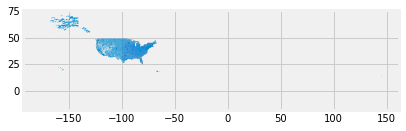

In [35]:
zips.plot();

In [36]:
zip_gen = general.groupby('Recipient_Zip_Code')['Total_Amount_of_Payment_USDollars'].sum().to_frame()
zip_gen.head()
zip_gen.sort_values('Total_Amount_of_Payment_USDollars',ascending=False)

,Total_Amount_of_Payment_USDollars
Recipient_Zip_Code,
02115,3097785.92
90095-3075,2127131.21
55905,1932368.32
77030,1326462.73
92374,1291897.72
38138-2405,1188185.23
02114,1160625.23
10471-1218,1145872.00
60612,1060238.56


In [37]:
zip_new = zips.set_index('GEOID10').join(zip_gen).dropna().reset_index()
zip_new.head()

,GEOID10,ZCTA5CE10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Total_Amount_of_Payment_USDollars
0,43452,43452,B5,G6350,S,121783674,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999...",615.74
1,43460,43460,B5,G6350,S,7164367,791729,+41.6011920,-083.5649985,"POLYGON ((-83.58803399999999 41.60095, -83.584...",148.98
2,97838,97838,B5,G6350,S,426018746,28267502,+45.8530040,-119.2872655,"POLYGON ((-119.624803 45.833443, -119.624033 4...",25.57
3,97850,97850,B5,G6350,S,749301594,1113672,+45.3035379,-118.1132779,"POLYGON ((-118.515474 45.246178, -118.515374 4...",459.00
4,94118,94118,B5,G6350,S,5047738,59174,+37.7800933,-122.4626054,"POLYGON ((-122.479412 37.77145, -122.479382 37...",85647.12


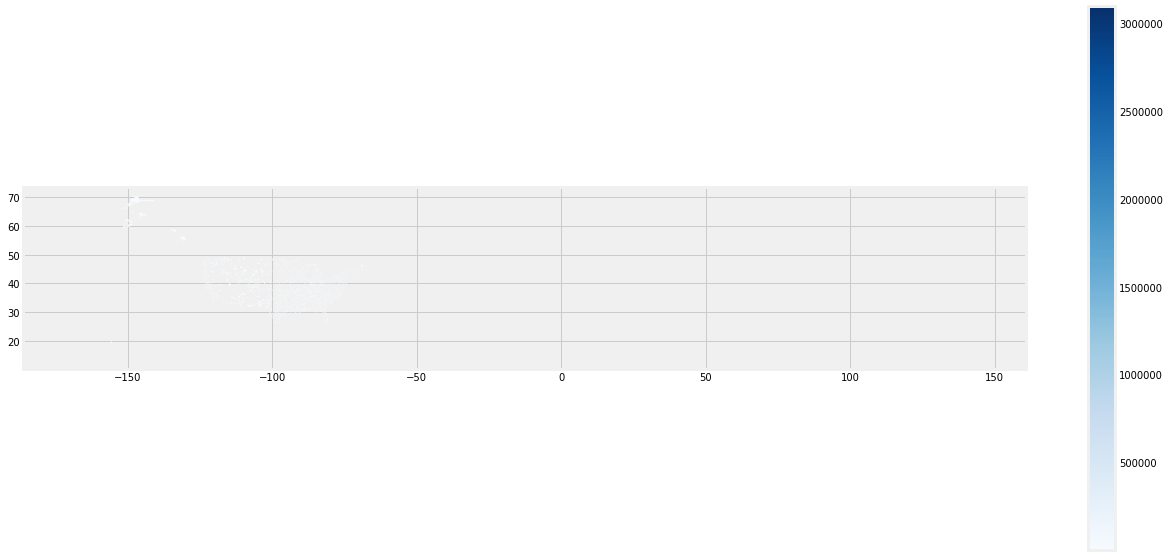

In [38]:
zip_new.plot(column='Total_Amount_of_Payment_USDollars',legend=True,figsize=(20,10),cmap='Blues')

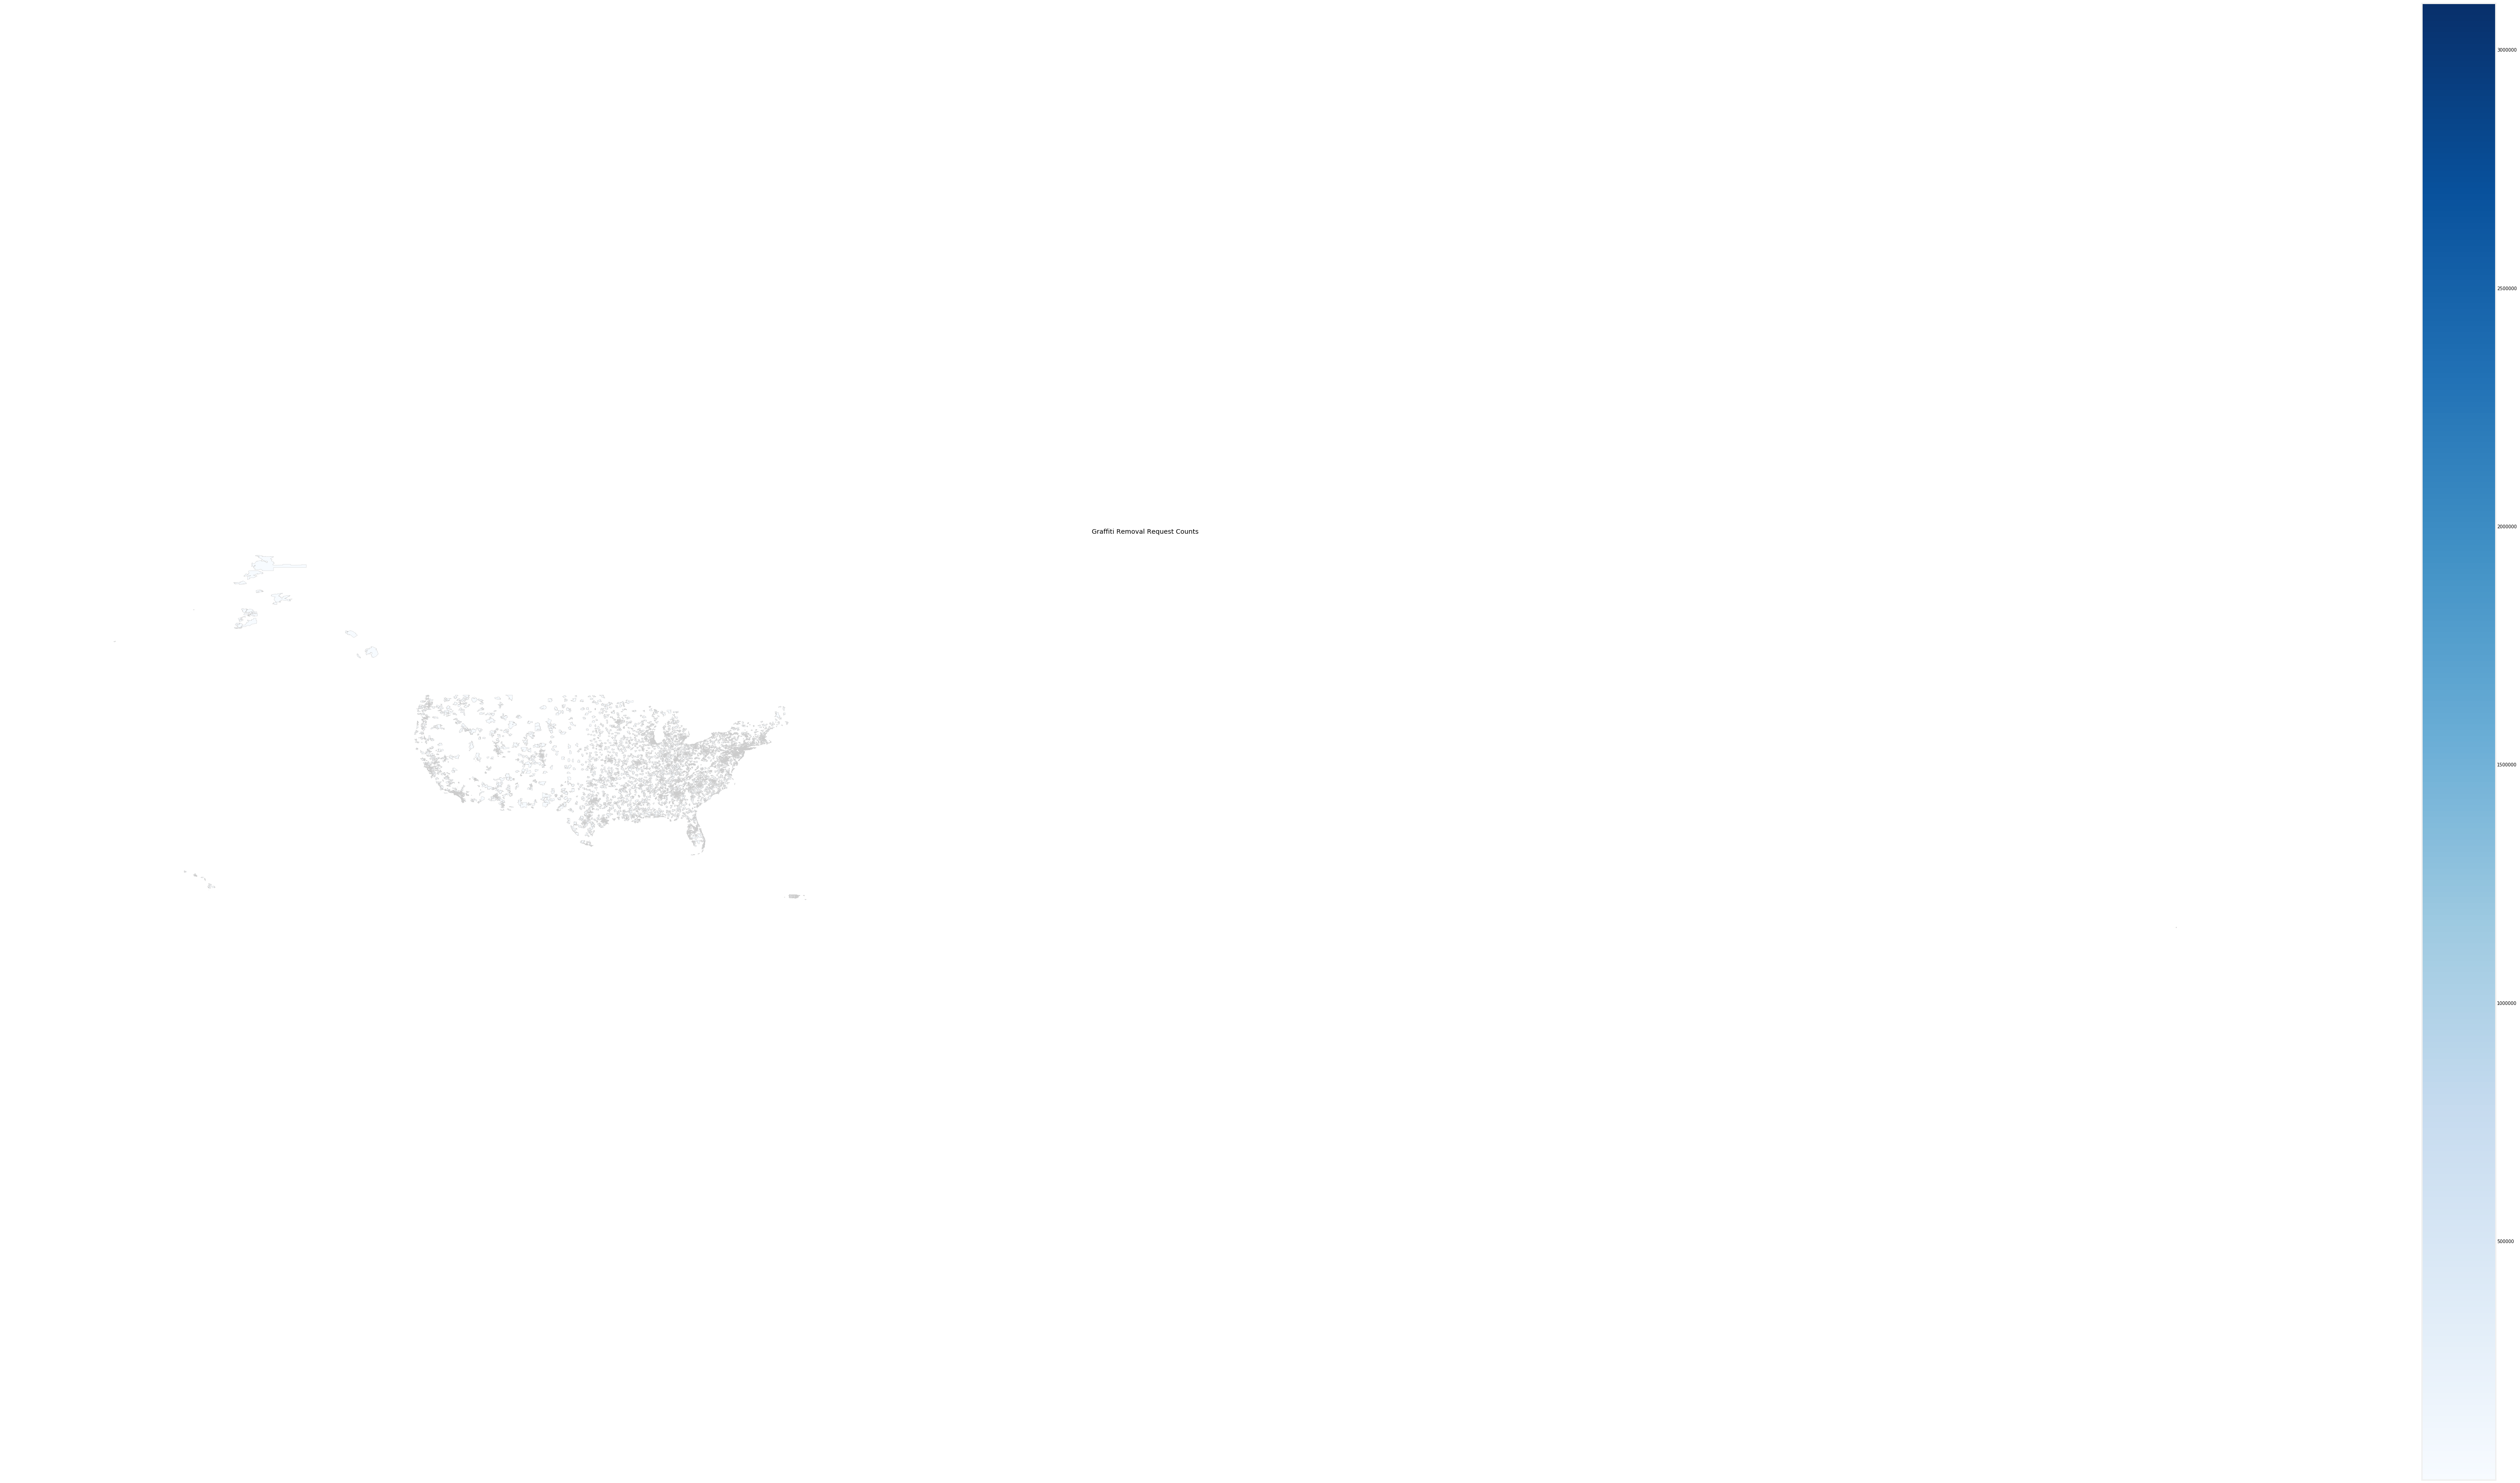

In [39]:
# column=
fig, ax = plots.subplots(1, figsize=(100, 60))
zip_new.plot(column="Total_Amount_of_Payment_USDollars", cmap='Blues', ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title("Graffiti Removal Request Counts")
sm = plots.cm.ScalarMappable(cmap='Blues')
sm._A = zip_new['Total_Amount_of_Payment_USDollars'] # if we want to have a scale from [0,1] then sm._A = []
cbar = fig.colorbar(sm)